### Importing the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting options to check max columns
pd.set_option('display.max_columns', None)
# loading the dataframe
loan_df = pd.read_csv(r"F:\IIITBangloreAIML\5. Case Study Lending Club\loan\loan.csv")

### Exploring the dataframe

In [3]:
loan_df.info('display.max_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
#checking null values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#checking colulmns that have all null value
columns_with_all_null_value = loan_df.columns[loan_df.isnull().sum() == 39717]

In [6]:
# drop column that have all the null values
filtered_loan_df = loan_df.drop(columns= columns_with_all_null_value)

### Exploring the filtered data frame

### Checking Null Count

In [7]:
filtered_loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Conversion of data types for columns

### column: term  --> for how much time loan has been taken by  the borrower

In [8]:
# checking for unique value in term column
filtered_loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
#converting type of column for calculation purpose
filtered_loan_df['term'] = filtered_loan_df['term'].str.replace('months', '').astype(int)

In [10]:
#renaming `term` column to `term in months` for better understanding
filtered_loan_df.rename(columns = {'term' : 'term in months'},  inplace= True)

### column: int_rate --> by what rate of interest loan was given

In [11]:
# checking for unique value in term column
filtered_loan_df['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [12]:
# replacing % sign from the column
filtered_loan_df['int_rate'] = filtered_loan_df['int_rate'].str.replace('%', '')

In [13]:
#converting type of column for calculation purpose
filtered_loan_df['int_rate'] = filtered_loan_df['int_rate'].astype(float)

### column: emp_length --> for how long borrower is working

In [14]:
# checking for unique value in term column
filtered_loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
# replacing `year` and `years` from column
filtered_loan_df['emp_length'] = filtered_loan_df['emp_length'].str.replace(' years', '').str.replace(' year', '')

In [16]:
# replacing `< ` and `+` from column
filtered_loan_df['emp_length'] = filtered_loan_df['emp_length'].str.replace('+', '').str.replace('< ', '')

In [17]:
# filling nan values with -1 value for ease and understanding
filtered_loan_df['emp_length'] = filtered_loan_df['emp_length'].fillna(-1)

In [18]:
#converting type of column for calculation purpose
filtered_loan_df['emp_length'] = filtered_loan_df['emp_length'].astype(int)

In [19]:
filtered_loan_df['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7, -1])

### column: issue_d --> on which month the loan was given

In [20]:
#checking for unique value
filtered_loan_df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [21]:
#converting to datetime format
filtered_loan_df['issue_d'] = pd.to_datetime(filtered_loan_df['issue_d'], format= '%b-%y')

In [22]:
#checking the result
filtered_loan_df['issue_d'].unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

### column: earliest_cr_line --> on which month the first credit line was open

In [23]:
#checking for unique value
filtered_loan_df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [24]:
#converting to datetime format
filtered_loan_df['earliest_cr_line'] = pd.to_datetime(filtered_loan_df['earliest_cr_line'], format= '%b-%y')

In [25]:
# Correct the century for years between 1900-1999
filtered_loan_df['earliest_cr_line'] = filtered_loan_df['earliest_cr_line'].apply(
    lambda x: x if x.year >= 2000 else x.replace(year=x.year - 100))

In [26]:
#checking the result
#filtered_loan_df['earliest_cr_line'].unique()

### column: desc --> description given by borrower why loan has been taken

In [27]:
#checking for unique value
filtered_loan_df['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

In [28]:
# filling nan with `borrower donot give any description` for better understanding
filtered_loan_df['desc'] = filtered_loan_df['desc'].fillna('borrower didnot give any description')

### column: purpose --> purpose as described by the lender company

In [29]:
#checking for unique value
filtered_loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

### column:  title --> title given by lender company

In [30]:
#checking for unique value
filtered_loan_df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [31]:
# checking for number of null values
filtered_loan_df['title'].isnull().sum()

11

In [32]:
# filling nan with `no title given` for better understanding
filtered_loan_df['title'] = filtered_loan_df['title'].fillna('no title given')

### column: zip_code --> address zipcode

In [33]:
#checking for unique value
filtered_loan_df['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [34]:
# removing 'xx' from zip code
filtered_loan_df['zip_code'] = filtered_loan_df['zip_code'].str.replace('xx', '')

In [35]:
# converting to int type
filtered_loan_df['zip_code'] = filtered_loan_df['zip_code'].astype(int)

### column: emp_title --> employee designation of the borrower

In [36]:
#checking number of null values
filtered_loan_df['emp_title'].isnull().sum()

2459

In [37]:
# converting nan with `either not working or self employed` for better understanding
filtered_loan_df['emp_title'] = filtered_loan_df['emp_title'].fillna('either not working or self employed')

### column: mths_since_last_delinq --> month when last deliquency has been done by borrower 

In [38]:
filtered_loan_df['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [39]:
# giving value of -1 for better understanding and later will help in plotting too
filtered_loan_df['mths_since_last_delinq']= filtered_loan_df['mths_since_last_delinq'].fillna(-1)

In [40]:
#converting column to int
filtered_loan_df['mths_since_last_delinq'] = filtered_loan_df['mths_since_last_delinq'].astype(int)

### column: mths_since_last_record --> month since last public record

In [41]:
# checking unique value
filtered_loan_df['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [42]:
# filling `-1` in nan value for our understanding meaning no past bad public record
filtered_loan_df['mths_since_last_record'] = filtered_loan_df['mths_since_last_record'].fillna(-1)

In [43]:
#converting column to int
filtered_loan_df['mths_since_last_record'] = filtered_loan_df['mths_since_last_record'].astype(int)

### column: revol_util --> what % of revol balance is the borrower using

In [44]:
# checking unique value
filtered_loan_df['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [45]:
#checking nan value
filtered_loan_df['revol_util'].isnull().sum()

50

In [46]:
# removing % from column
filtered_loan_df['revol_util'] = filtered_loan_df['revol_util'].str.replace('%','')

In [47]:
#fill nan with -1 for our ease
filtered_loan_df['revol_util'] = filtered_loan_df['revol_util'].fillna(-1)

In [48]:
# converting column to float
filtered_loan_df['revol_util'] = filtered_loan_df['revol_util'].astype(float)

In [49]:
#renaming `revol_util` column to `revol_util in %` for better understanding
filtered_loan_df.rename(columns = {'revol_util' : 'revol_util in %'},  inplace= True)

### column: last_pymnt_d --> when was the last installment was given

In [50]:
filtered_loan_df['last_pymnt_d'] = pd.to_datetime(filtered_loan_df['last_pymnt_d'], format= '%b-%y')

In [51]:
# checking the loan status for the rows that have last_pymt_d as nan
filtered_loan_df[(filtered_loan_df['last_pymnt_d'].isna())]['loan_status'].unique()

array(['Charged Off'], dtype=object)

In [52]:
#converting to datetime
filtered_loan_df['last_pymnt_d'] = pd.to_datetime(filtered_loan_df['last_pymnt_d'], format= '%b-%y')

In [53]:
# since all of the null values are already charged off we can give them -1 for our understanding
filtered_loan_df['last_pymnt_d']= filtered_loan_df['last_pymnt_d'].fillna(-1)

### column: next_pymnt_d --> when is the next payment due

In [54]:
# checking the loan status for the rows that have next_pymt_d as nan
filtered_loan_df[(filtered_loan_df['next_pymnt_d'].isna())]['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [55]:
#converting to datetime
filtered_loan_df['next_pymnt_d'] = pd.to_datetime(filtered_loan_df['next_pymnt_d'], format= '%b-%y')

In [56]:
# since all of the null values are already charged off or fully paid we can give them -1 for our understanding
filtered_loan_df['next_pymnt_d']= filtered_loan_df['next_pymnt_d'].fillna(-1)

### column: last_credit_pull_d --> when is the last credit was pulled

In [57]:
filtered_loan_df[filtered_loan_df['last_credit_pull_d'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term in months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util in %,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36,11.12,163.98,B,B3,either not working or self employed,5,RENT,96000.0,Not Verified,2010-09-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,borrower didnot give any description,small_business,for my toy business,900,CA,4.04,0,1897-10-01,0,-1,-1,4,0,7172,80.6,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,2012-06-01 00:00:00,163.98,-1,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36,7.12,30.94,A,A1,either not working or self employed,1,MORTGAGE,120000.0,Not Verified,2007-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,No more then 25$ per lender. Please read the r...,other,Research On Global Warming,941,CA,0.65,0,1897-07-01,1,0,0,7,0,2227,3.8,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,2010-08-01 00:00:00,185.80,-1,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [58]:
filtered_loan_df['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

### column: collections_12_mths_ex_med --> recovery after charged off after 12 months

In [59]:
#checking unique value
filtered_loan_df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

### we can drop this column as not adding any value to our data

### column: pub_rec_bankruptcies --> if any record of bankruptcies

In [60]:
#checking unique value
filtered_loan_df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [61]:
#  fillling -1 for nan to better understanding
filtered_loan_df['pub_rec_bankruptcies'] = filtered_loan_df['pub_rec_bankruptcies'].fillna(-1)

### column: chargeoff_within_12_mths --> recovery after charged off within 12 months

In [62]:
#checking unique value
filtered_loan_df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

### column: tax_liens -->  any number of tax liens by government

In [63]:
#checking unique value
filtered_loan_df['tax_liens'].unique()

array([ 0., nan])

### column: `acc_now_delinq`

In [64]:
#checking unique value
filtered_loan_df['acc_now_delinq'].unique()

array([0], dtype=int64)

In [65]:
#we can drop these columns that have all 0 value as not adding any value to our data

In [66]:
#dropping column that are not adding any value
filtered_loan_df = filtered_loan_df.drop(columns= ['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'acc_now_delinq'])

### Column : `initial_list_status`

In [67]:
#dropping this column as all have the same value hence initial_list_status
filtered_loan_df = filtered_loan_df.drop(columns= ['initial_list_status'])

In [68]:
# resetting the index
filtered_loan_df.reset_index(drop= True, inplace= True)

# Visual Analysis

### Defining a `is_defaulter` column where 1 means defaulter and 0 means not a defaulter

In [69]:
filtered_loan_df['is_defaulter'] = filtered_loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

###  Graphical representation of the type of `loan_status` to see how many have been charged off

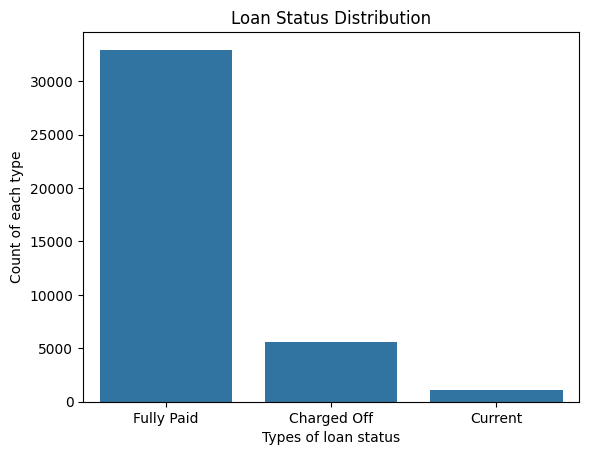

In [70]:
sns.countplot(data = filtered_loan_df, x= 'loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Types of loan status')
plt.ylabel('Count of each type')
plt.show()


### Observation :  we have almost 1/8 defaulters out off total data

## exploring `loan_amnt` column

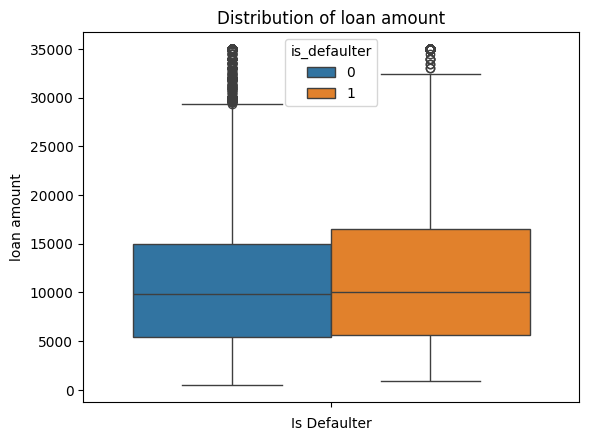

In [71]:
sns.boxplot(data = filtered_loan_df, y='loan_amnt',hue='is_defaulter')
plt.title('Distribution of loan amount')
plt.ylabel('loan amount')
plt.xlabel('Is Defaulter')
plt.show()

### Observation : we can see that there are few amount > 29250 that can be called outliers lets see if that can make any relation with the defaulters

In [72]:
# calculating the upper whisker for loan amount
loan_amount_75th_percentile = filtered_loan_df['loan_amnt'].quantile(0.75)
loan_amount_25th_percentile = filtered_loan_df['loan_amnt'].quantile(0.25)
iqr_loan_amount = loan_amount_75th_percentile - loan_amount_25th_percentile
upperwhisker_value = loan_amount_75th_percentile + (1.5 * iqr_loan_amount)

In [73]:
filtered_loan_df[filtered_loan_df['loan_amnt'] > upperwhisker_value]['is_defaulter'].value_counts()

is_defaulter
0    977
1    253
Name: count, dtype: int64

### Observation : we can see that the borrower taking loan > 29250 is less likely to make default.

## Now lets check `grade` Column

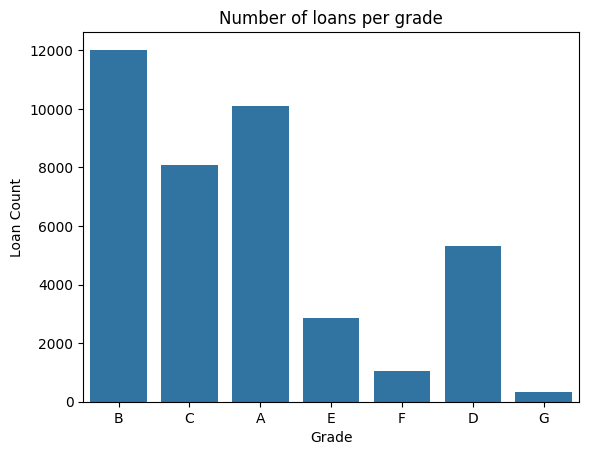

In [74]:
sns.countplot(data = filtered_loan_df, x = 'grade')
plt.title('Number of loans per grade')
plt.xlabel('Grade')
plt.ylabel('Loan Count')
plt.show()

### Observation : We can see clearly that less loan has been given to grade `E, F, G`

## Lets check if that can stop or atleast reduce the defaulters

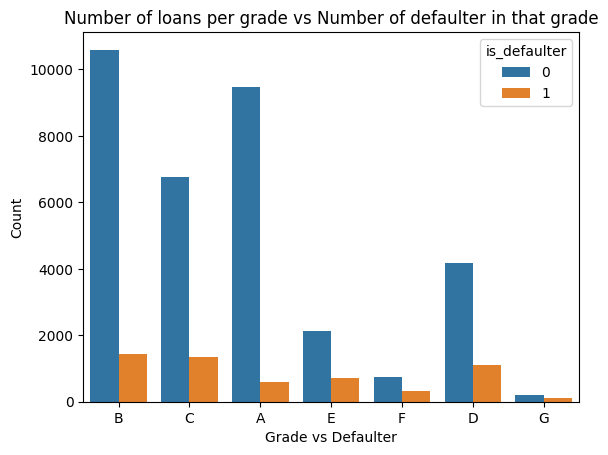

In [75]:
sns.countplot(data = filtered_loan_df, x = 'grade',  hue = filtered_loan_df['is_defaulter'].astype(str))
plt.title('Number of loans per grade vs Number of defaulter in that grade')
plt.xlabel('Grade vs Defaulter')
plt.ylabel('Count')
plt.show()

### Observation :  we can clearly see that grading system have clearly reduce the defaulter percentage.

## Now explore `sub_grade`

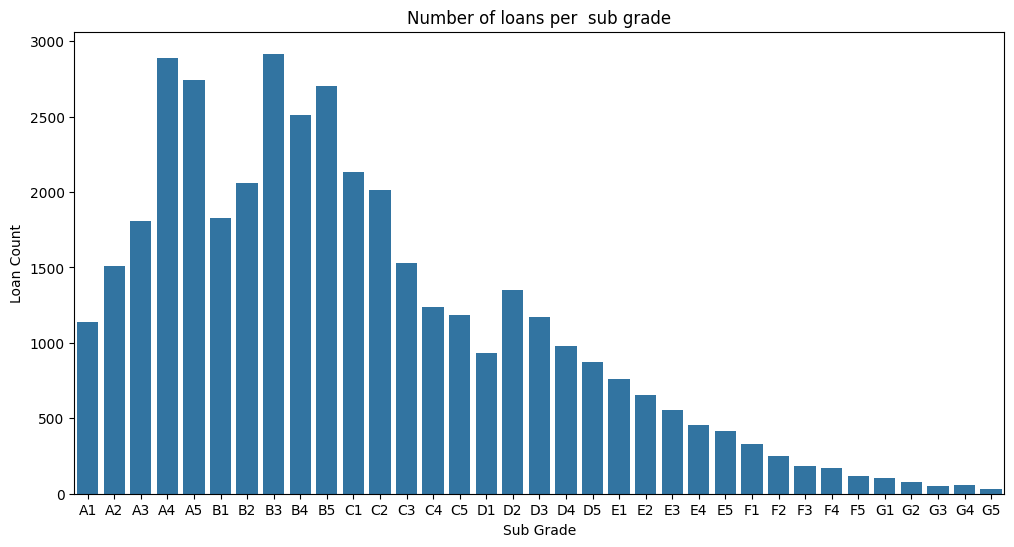

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(data = filtered_loan_df, x = 'sub_grade', order= sorted(filtered_loan_df['sub_grade'].unique()))
plt.title('Number of loans per  sub grade')
plt.xlabel('Sub Grade')
plt.ylabel('Loan Count')
plt.show()

### Observation : We can observe a trend where the number of loans approved decreases as we move into the riskier category.

##  Lets see if that make any impact on the defaulters

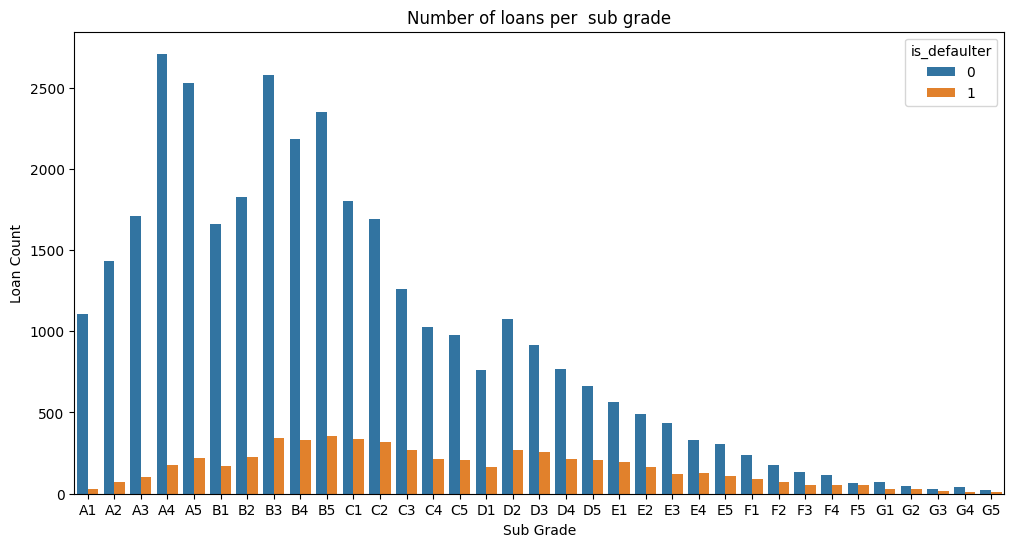

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(data = filtered_loan_df, x = 'sub_grade', order= sorted(filtered_loan_df['sub_grade'].unique()),               
              hue= filtered_loan_df['is_defaulter'].astype(str))
plt.title('Number of loans per  sub grade')
plt.xlabel('Sub Grade')
plt.ylabel('Loan Count')
plt.show()

### Observation : We can see that there is good affect of grading and subgrading, we can conclude that we should avoid giving loan to riskier client but its not very conclusive lets dive further.

# Lets now explore the `annual_inc` column

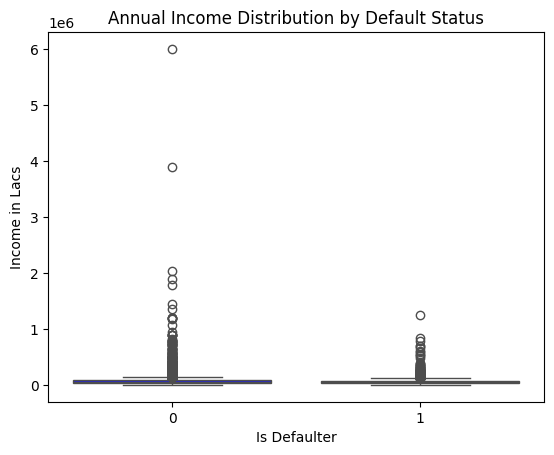

In [78]:
sns.boxplot(
    data=filtered_loan_df, 
    x='is_defaulter', 
    y='annual_inc', 
    palette={'0': 'blue', '1': 'orange'}  # Use strings as keys
)
plt.title('Annual Income Distribution by Default Status')
plt.xlabel('Is Defaulter')
plt.ylabel('Income in Lacs')
plt.show()

### Observation : we can clearly see there are very big outliers we can check if they have any relation with the increase in salary.

In [79]:
# calculating the upper whisker for annual_inc
annual_inc_75th_percentile = filtered_loan_df['annual_inc'].quantile(0.75)
annual_inc_25th_percentile = filtered_loan_df['annual_inc'].quantile(0.25)
iqr_annual_inc = annual_inc_75th_percentile - annual_inc_25th_percentile
upperwhisker_value_annual_inc = annual_inc_75th_percentile + (1.5 * iqr_annual_inc)

In [80]:
# checking the defaulter with salary lower than upperwhisker_value_annual_inc
(filtered_loan_df[filtered_loan_df['annual_inc'] < upperwhisker_value_annual_inc]['is_defaulter'].value_counts() / 
len(filtered_loan_df[filtered_loan_df['annual_inc'] < upperwhisker_value_annual_inc])) * 100

is_defaulter
0    85.660347
1    14.339653
Name: count, dtype: float64

In [81]:
# checking the defaulter with salary greater than upperwhisker_value_annual_inc 
(filtered_loan_df[filtered_loan_df['annual_inc'] > upperwhisker_value_annual_inc]['is_defaulter'].value_counts() / 
len(filtered_loan_df[filtered_loan_df['annual_inc'] > upperwhisker_value_annual_inc])) *100

is_defaulter
0    89.365165
1    10.634835
Name: count, dtype: float64

In [82]:
# checking the defaulter with salary greater than 1000000
(filtered_loan_df[filtered_loan_df['annual_inc'] > 1000000]['is_defaulter'].value_counts() / 
len(filtered_loan_df[filtered_loan_df['annual_inc'] > 1000000])) *100

is_defaulter
0    92.857143
1     7.142857
Name: count, dtype: float64

### Observation : We can clearly see that as the salary is increasing the percentage of defaulters are decreasing from `14.90` to `10.63` to `7.14`

## Checking whether a higher debt-to-income ratio (dti) is associated with higher default rates

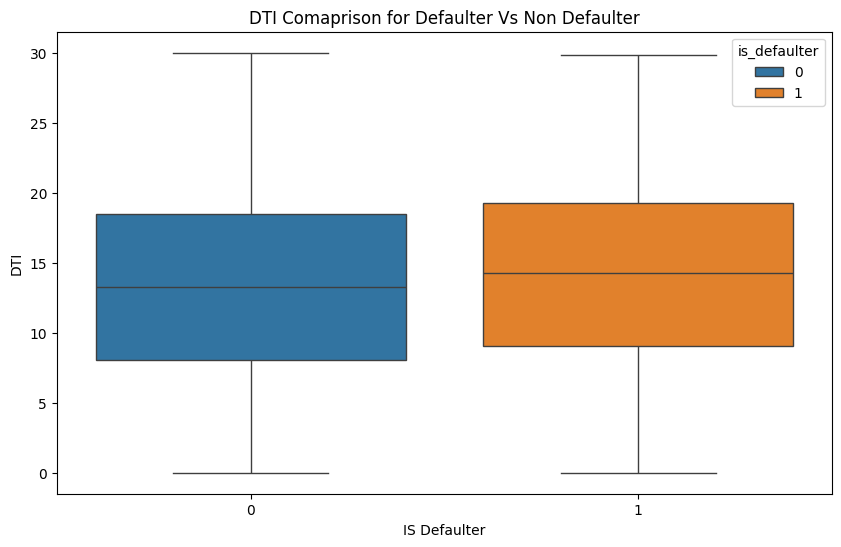

In [83]:
# dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
plt.figure(figsize=[10,6])
sns.boxplot(x='is_defaulter',y='dti',data=filtered_loan_df,hue='is_defaulter')
plt.title('DTI Comaprison for Defaulter Vs Non Defaulter')
plt.xlabel('IS Defaulter')
plt.ylabel('DTI')
plt.show()

### there’s a slight upward shift in the DTI range for defaulters, indicating that defaulters might have a marginally higher debt-to-income ratio than non-defaulters.

### The interquartile range (IQR), represented by the box, appears to be slightly less for defaulters, suggesting there is more variability in DTI among defaulters.

In [84]:
defaulter_grouped_data=filtered_loan_df.groupby('is_defaulter')

In [85]:
defaulter_grouped_data['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
is_defaulter,,,,,,,,
0,34090.0,13.201980,6.687165,0.0,8.04,13.25,18.46,29.99
1,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85


IQR FOR IS_DEFAULTER = 0 -> 18.46-8.04 = 10.42 <br/>
IQR FOR IS_DEFAULTER = 1 -> 19.29-9.05 = 10.24

### Observation
### The median DTI for defaulters (14.29) is slightly higher than that for non-defaulters (13.25), indicating that defaulters, on average, carry a marginally higher debt load relative to their income.
### Even though there is a slightly higher DTI among defaulters, the overlap in the IQR suggests that DTI alone is not a clear distinguishing factor for defaults.

# Checking Relation Between Defaulter VS InterestRate (int_rate)

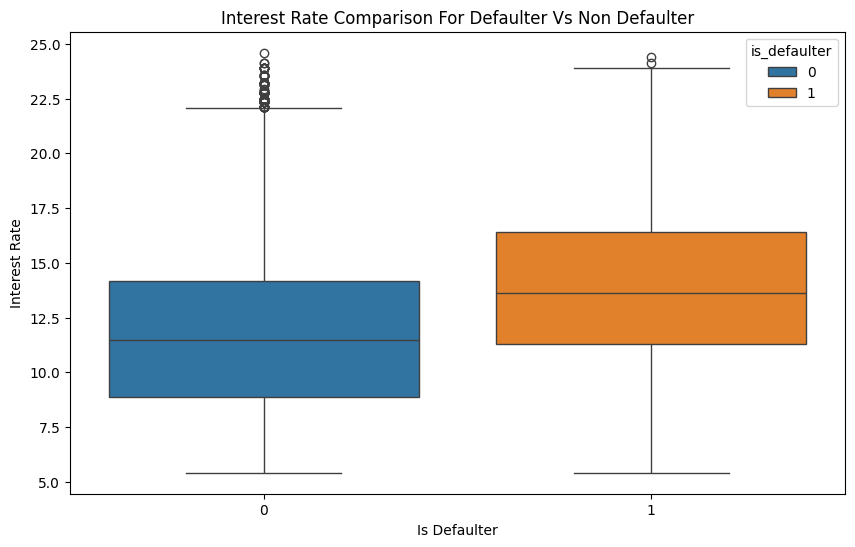

In [86]:
plt.figure(figsize=[10,6])
sns.boxplot(x='is_defaulter',y='int_rate',data=filtered_loan_df,hue='is_defaulter')
plt.title("Interest Rate Comparison For Defaulter Vs Non Defaulter")
plt.xlabel("Is Defaulter")
plt.ylabel("Interest Rate")
plt.show()

In [87]:
defaulter_grouped_data['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_defaulter,,,,,,,,
0,34090.0,11.724186,3.652109,5.42,8.88,11.49,14.17,24.59
1,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40


IQR FOR IS_DEFAULTER = 0 -> 14.17-8.88 = 5.29<br/>
IQR FOR IS_DEFAULTER = 1 -> 16.40-11.31 = 5.09

### The mean interest rate for defaulters (13.82%) is higher than for non-defaulters (11.72%), indicating that loans with higher interest rates are more likely to default. <br/>
### The median interest rate for defaulters (13.61%) is also higher than for non-defaulters (11.49%).<br/>
### Higher interest rates might be a strong indicator of default risk, possibly because higher rates are assigned to applicants with higher risk profiles.<br/>
### This relationship can be useful for risk assessment, suggesting that loans with interest rates above a certain threshold might need closer monitoring.


# Checking the `verification_status` Column for Defaulters Only

In [88]:
filtered_loan_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

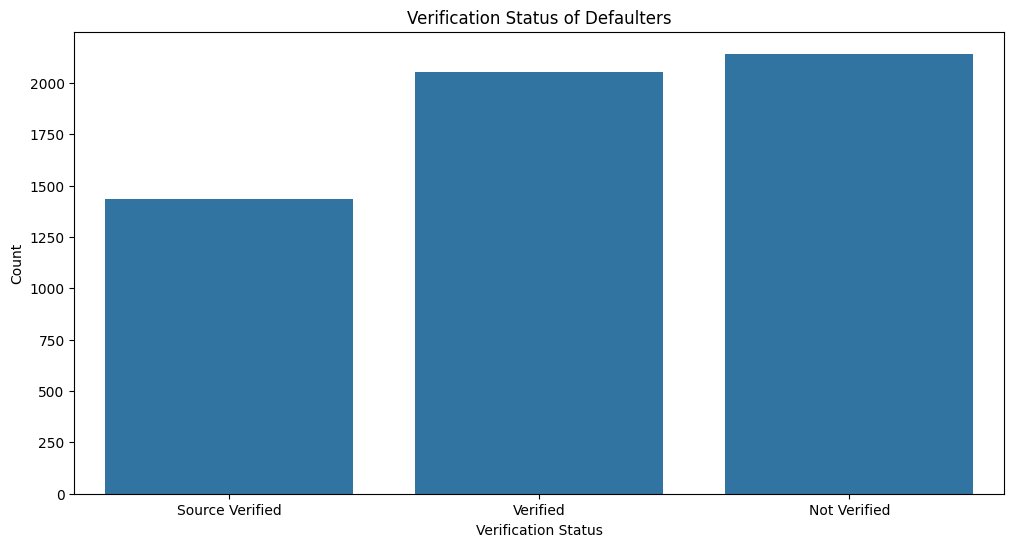

In [89]:
plt.figure(figsize=[12,6])
sns.countplot(x='verification_status',data=filtered_loan_df[filtered_loan_df['is_defaulter']==1])
plt.title('Verification Status of Defaulters')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

### Observation : The count of Not Verified Applicants are higher as compared to to the Verified Applicants 

# Checking the Loan Purpose VS Defaulters

In [90]:
filtered_loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

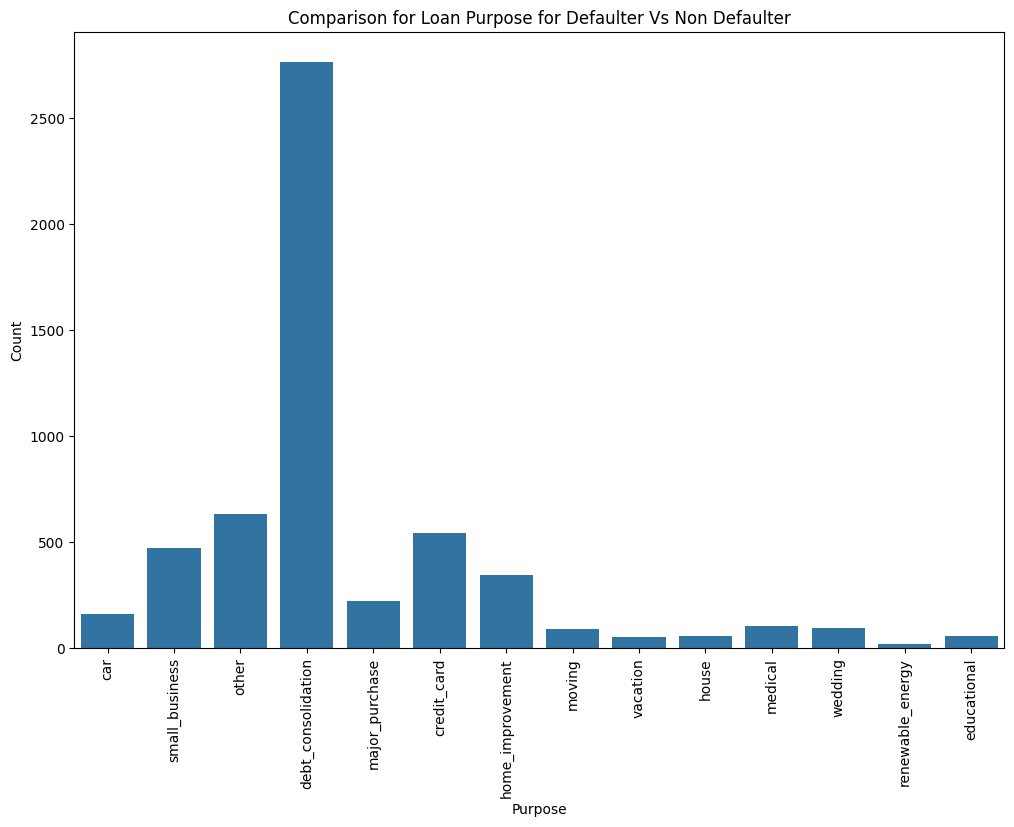

In [91]:
plt.figure(figsize=[12,8])
sns.countplot(data=filtered_loan_df[filtered_loan_df['is_defaulter']==1],x='purpose')
plt.title('Comparison for Loan Purpose for Defaulter Vs Non Defaulter')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [92]:
# numerical analysis
filtered_loan_df[filtered_loan_df['is_defaulter']==1]['purpose'].value_counts()

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: count, dtype: int64

### Observation :  Cases where the purpose of taking loan was debt_consolidation has seen the major number of defaulters as compared to other categories. So we need to adjust the policies and interest rates for this category specially.

# Correlation Between Columns 'loan_amnt', 'annual_inc', 'dti', 'int_rate', 'is_defaulter'

In [93]:
cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'is_defaulter']
corr_matrix = filtered_loan_df[cols].corr()
print(corr_matrix)

              loan_amnt  annual_inc       dti  int_rate  is_defaulter
loan_amnt      1.000000    0.271149  0.066439  0.309415      0.048217
annual_inc     0.271149    1.000000 -0.122732  0.053185     -0.041662
dti            0.066439   -0.122732  1.000000  0.111162      0.041701
int_rate       0.309415    0.053185  0.111162  1.000000      0.196253
is_defaulter   0.048217   -0.041662  0.041701  0.196253      1.000000


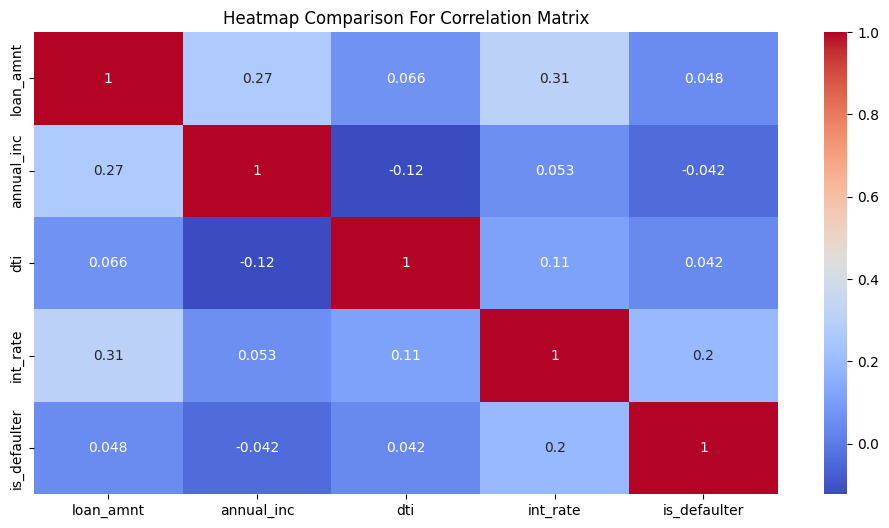

In [94]:
plt.figure(figsize=[12,6])
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.title("Heatmap Comparison For Correlation Matrix")
plt.show()

### The most meaningful finding here is the relationship between int_rate and is_defaulter, which can be used as a potential indicator of default risk.
### There is a strong relationship between the loan_amnt column and the annual_inc column (0.27) suggesting that borrowers with higher incomes tend to take larger loans.
### Strong relation between loan_amnt and int_rate hence larger loan_amnt will attract more interest.
### Although other correlations are weak, they can still be considered as part of a multivariate analysis to explore complex relationships.

# Pairplots for columns having correlation > 0.2 with IS_DEFAULTER Column

In [95]:
filtered_loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term in months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util in %', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'delinq_amnt', 'pub_rec_bankruptcies', 'is_defaulter'],
      dtype='object')

In [96]:
corr_matrix = filtered_loan_df.corr(numeric_only=True)

In [97]:
corr_matrix['is_defaulter']

id                         0.028370
member_id                  0.026438
loan_amnt                  0.048217
funded_amnt                0.045544
funded_amnt_inv            0.026621
term in months             0.146038
int_rate                   0.196253
installment                0.022589
emp_length                 0.002429
annual_inc                -0.041662
zip_code                   0.018128
dti                        0.041701
delinq_2yrs                0.019904
inq_last_6mths             0.071717
mths_since_last_delinq     0.020431
mths_since_last_record     0.053277
open_acc                  -0.010742
pub_rec                    0.050880
revol_bal                  0.003369
revol_util in %            0.095118
total_acc                 -0.023563
out_prncp                 -0.055476
out_prncp_inv             -0.055417
total_pymnt               -0.238844
total_pymnt_inv           -0.236232
total_rec_prncp           -0.335019
total_rec_int             -0.010780
total_rec_late_fee         0

In [98]:
corr_matrix[corr_matrix['is_defaulter']>0.2]['is_defaulter'].index.to_list()

['recoveries', 'collection_recovery_fee', 'is_defaulter']

In [99]:
corr_column = corr_matrix[corr_matrix['is_defaulter']>0.2]['is_defaulter'].index.to_list()

### recoveries : post charge off gross recovery ("Post charge-off gross recovery" refers to the amount of money collected from a debt after it has been charged off by a lender)
### collection_recovery_fee:  post charge off collection fee (A "post charge-off collection fee" is an additional fee that a lender may charge after a debt has been charged off.) 

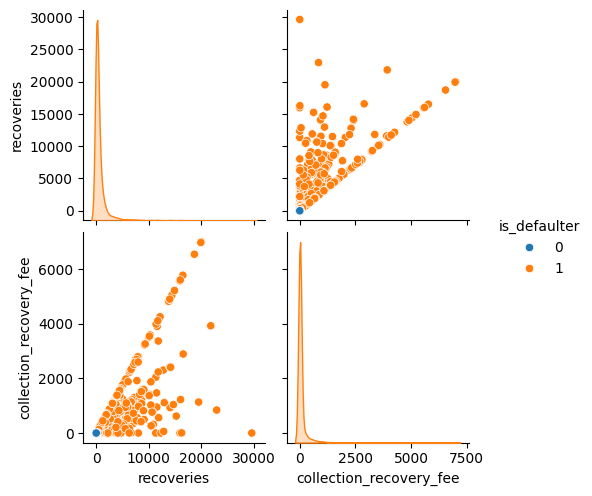

In [100]:

sns.pairplot(filtered_loan_df[corr_column] , hue='is_defaulter')
#plt.title('Pair Plot Comparison (recoveries , collection_recovery_fee) Based on is_defaulter')
plt.show()

### Observation
### Collection_recovery_fee and recoveries have a high positive correlation. Generally speaking, the collection recovery charge rises in tandem with the number of recoveries. Because of the linear nature of this connection, larger recoveries are linked to higher collection fees.

### Higher values of recoveries and collection_recovery_fee cluster the majority of defaulters (is_defaulter = 1). This suggests that, in comparison to non-defaulters, defaulters frequently have larger recovery amounts and related expenses.

# Lets now explore the `total_acc` column

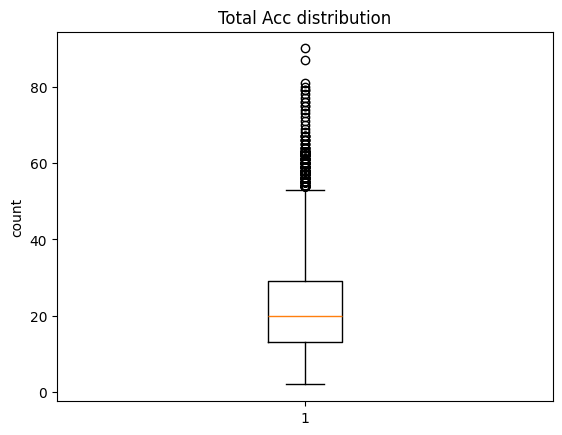

In [101]:
plt.boxplot(filtered_loan_df['total_acc'])
plt.title('Total Acc distribution')
plt.ylabel('count')
plt.show()

### There are few outliers in total account range approx above 55 lets check deep

In [102]:
# calculating the upper whisker for annual_inc
total_acc_75th_percentile = filtered_loan_df['total_acc'].quantile(0.75)
total_acc_25th_percentile = filtered_loan_df['total_acc'].quantile(0.25)
iqr_total_acc = total_acc_75th_percentile - total_acc_25th_percentile
upperwhisker_value_total_acc = total_acc_75th_percentile + (1.5 * iqr_total_acc)

In [103]:
upperwhisker_value_total_acc

53.0

In [104]:
# checking the defaulter with salary greater than upperwhisker_value_total_acc 
(filtered_loan_df[filtered_loan_df['total_acc'] > upperwhisker_value_total_acc]['is_defaulter'].value_counts() / 
len(filtered_loan_df[filtered_loan_df['total_acc'] > upperwhisker_value_total_acc])) *100

is_defaulter
0    86.666667
1    13.333333
Name: count, dtype: float64

In [105]:
# checking the defaulter with salary smaller than upperwhisker_value_total_acc 
(filtered_loan_df[filtered_loan_df['total_acc'] < upperwhisker_value_total_acc]['is_defaulter'].value_counts() / 
len(filtered_loan_df[filtered_loan_df['total_acc'] < upperwhisker_value_total_acc])) *100

is_defaulter
0    85.810362
1    14.189638
Name: count, dtype: float64

### Observation :  Since there is just a 1% variation in the number of defaulters, we may conclude that anyone can become a defaulter regardless of how many credit accounts they have.

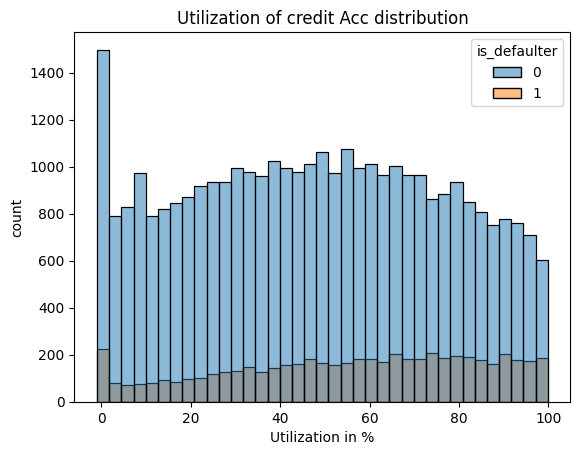

In [106]:
sns.histplot(x='revol_util in %', data = filtered_loan_df, hue= filtered_loan_df['is_defaulter'].astype(str))
plt.title('Utilization of credit Acc distribution')
plt.xlabel('Utilization in %')
plt.ylabel('count')
plt.show()

### Observation:  Defaulter is from each range , this doesn't make any reltion as such.

# `emp_length`

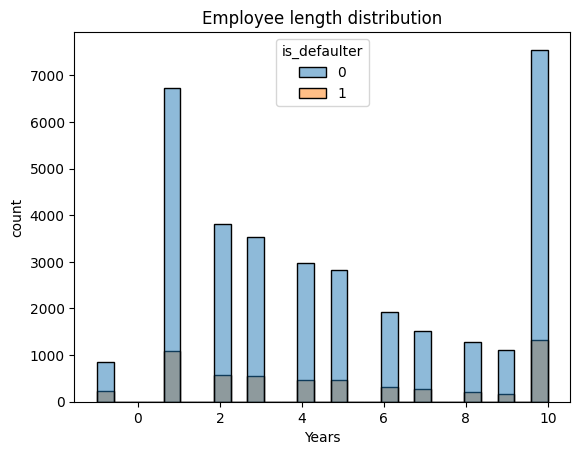

In [107]:
sns.histplot(x='emp_length', data = filtered_loan_df, hue= filtered_loan_df['is_defaulter'].astype(str))
plt.title('Employee length distribution')
plt.xlabel('Years')
plt.ylabel('count')
plt.show()

### `delinq_2yrs`

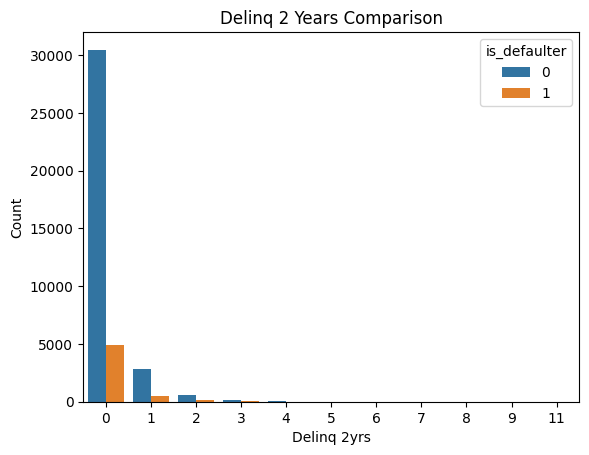

In [108]:

sns.countplot(data = filtered_loan_df, x='delinq_2yrs', hue=filtered_loan_df['is_defaulter'].astype(str))
plt.title('Delinq 2 Years Comparison')
plt.xlabel('Delinq 2yrs')
plt.ylabel('Count')
plt.show()

In [109]:
filtered_loan_df['is_defaulter'].value_counts()

is_defaulter
0    34090
1     5627
Name: count, dtype: int64

In [110]:
filtered_loan_df[filtered_loan_df['delinq_2yrs']==0]['is_defaulter'].value_counts()

is_defaulter
0    30469
1     4936
Name: count, dtype: int64

### Observation :  We can see that there are 5627 deafaulters and out of that almost 4936 have no deliq in last 2 yrs so we can say that they can be new defaulters or have done default long time back, lets explore more.

In [111]:
filtered_loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term in months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util in %', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'delinq_amnt', 'pub_rec_bankruptcies', 'is_defaulter'],
      dtype='object')

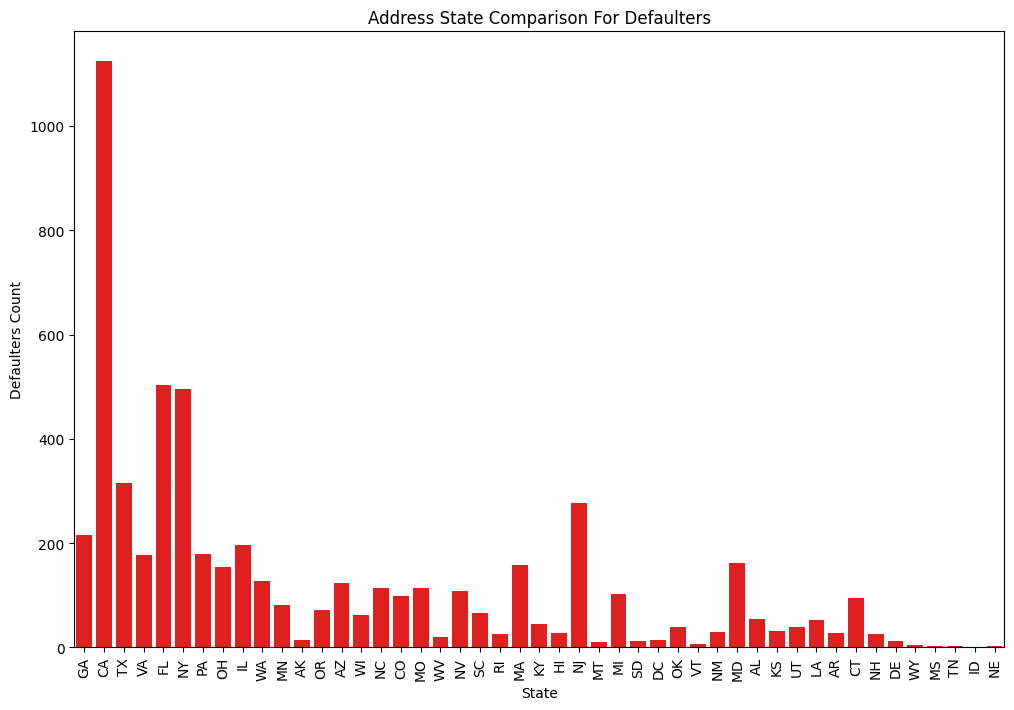

In [112]:
plt.figure(figsize=[12,8])
plt.title('Address State Comparison For Defaulters')
sns.countplot(data=filtered_loan_df[filtered_loan_df['is_defaulter']==1],x='addr_state',color='red')
plt.xlabel('State')
plt.ylabel('Defaulters Count')
plt.xticks(rotation=90)
plt.show()

## Observation : Maximum number of defaulters are coming from states CA , FL , NY...

# Major Conclusions 

### Our research indicates that borrowers with the following characteristics are significantly more likely to default on their loans:<br/>

### Low Income: Borrowers earning below a defined salary threshold.<br/>

### Purpose of Loan: Loans taken specifically for debt consolidation.<br/>

### Loan Amount: Borrowers seeking loans of less than $30,000.<br/>

### Loan Grade: Loans with a grade equal to or above the mid-tier (e.g., E or higher).<br/>

### Interest Rate: Loans with interest rates exceeding 15%, reflecting prior credit challenges.<br/>
